# Start

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec

In [ ]:
dataset = pd.read_csv("dataset.csv")
carr=pd.read_csv('carriers.csv')

In [ ]:
dataset.head()

,year,month,day,dep_time,arr_delay,carrier,origin,dest,distance,temp,humid,wind_speed,precip,pressure,time,bin
0,2013,1,1,554.0,-25.0,DL,LGA,ATL,762.0,39.02,59.37,10.35702,0.0,1012.0,Early,1
1,2013,1,1,555.0,19.0,B6,EWR,FLL,1065.0,39.02,59.37,10.35702,0.0,1012.0,Late,1
2,2013,1,1,557.0,-14.0,EV,LGA,IAD,229.0,39.02,59.37,10.35702,0.0,1012.0,On time,0
3,2013,1,1,557.0,-8.0,B6,JFK,MCO,944.0,39.02,59.37,10.35702,0.0,1012.0,On time,0
4,2013,1,1,558.0,8.0,AA,LGA,ORD,733.0,39.02,59.37,10.35702,0.0,1012.0,On time,0


# Quick Look at the data 

In [ ]:
dataset.head()

,year,month,day,dep_time,arr_delay,carrier,origin,dest,distance,temp,humid,wind_speed,precip,pressure,time,bin
0,2013,1,1,554.0,-25.0,DL,LGA,ATL,762.0,39.02,59.37,10.35702,0.0,1012.0,Early,1
1,2013,1,1,555.0,19.0,B6,EWR,FLL,1065.0,39.02,59.37,10.35702,0.0,1012.0,Late,1
2,2013,1,1,557.0,-14.0,EV,LGA,IAD,229.0,39.02,59.37,10.35702,0.0,1012.0,On time,0
3,2013,1,1,557.0,-8.0,B6,JFK,MCO,944.0,39.02,59.37,10.35702,0.0,1012.0,On time,0
4,2013,1,1,558.0,8.0,AA,LGA,ORD,733.0,39.02,59.37,10.35702,0.0,1012.0,On time,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316165 entries, 0 to 316164
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           316165 non-null  int64  
 1   year            316165 non-null  int64  
 2   month           316165 non-null  int64  
 3   day             316165 non-null  int64  
 4   dep_time        316165 non-null  float64
 5   sched_dep_time  316165 non-null  float64
 6   dep_delay       316165 non-null  float64
 7   arr_time        316165 non-null  float64
 8   sched_arr_time  316165 non-null  float64
 9   arr_delay       316165 non-null  float64
 10  carrier         316165 non-null  object 
 11  flight          316165 non-null  float64
 12  tailnum         316165 non-null  object 
 13  origin          316165 non-null  object 
 14  dest            316165 non-null  object 
 15  air_time        316165 non-null  float64
 16  distance        316165 non-null  float64
 17  hour      

# Visualizing the data

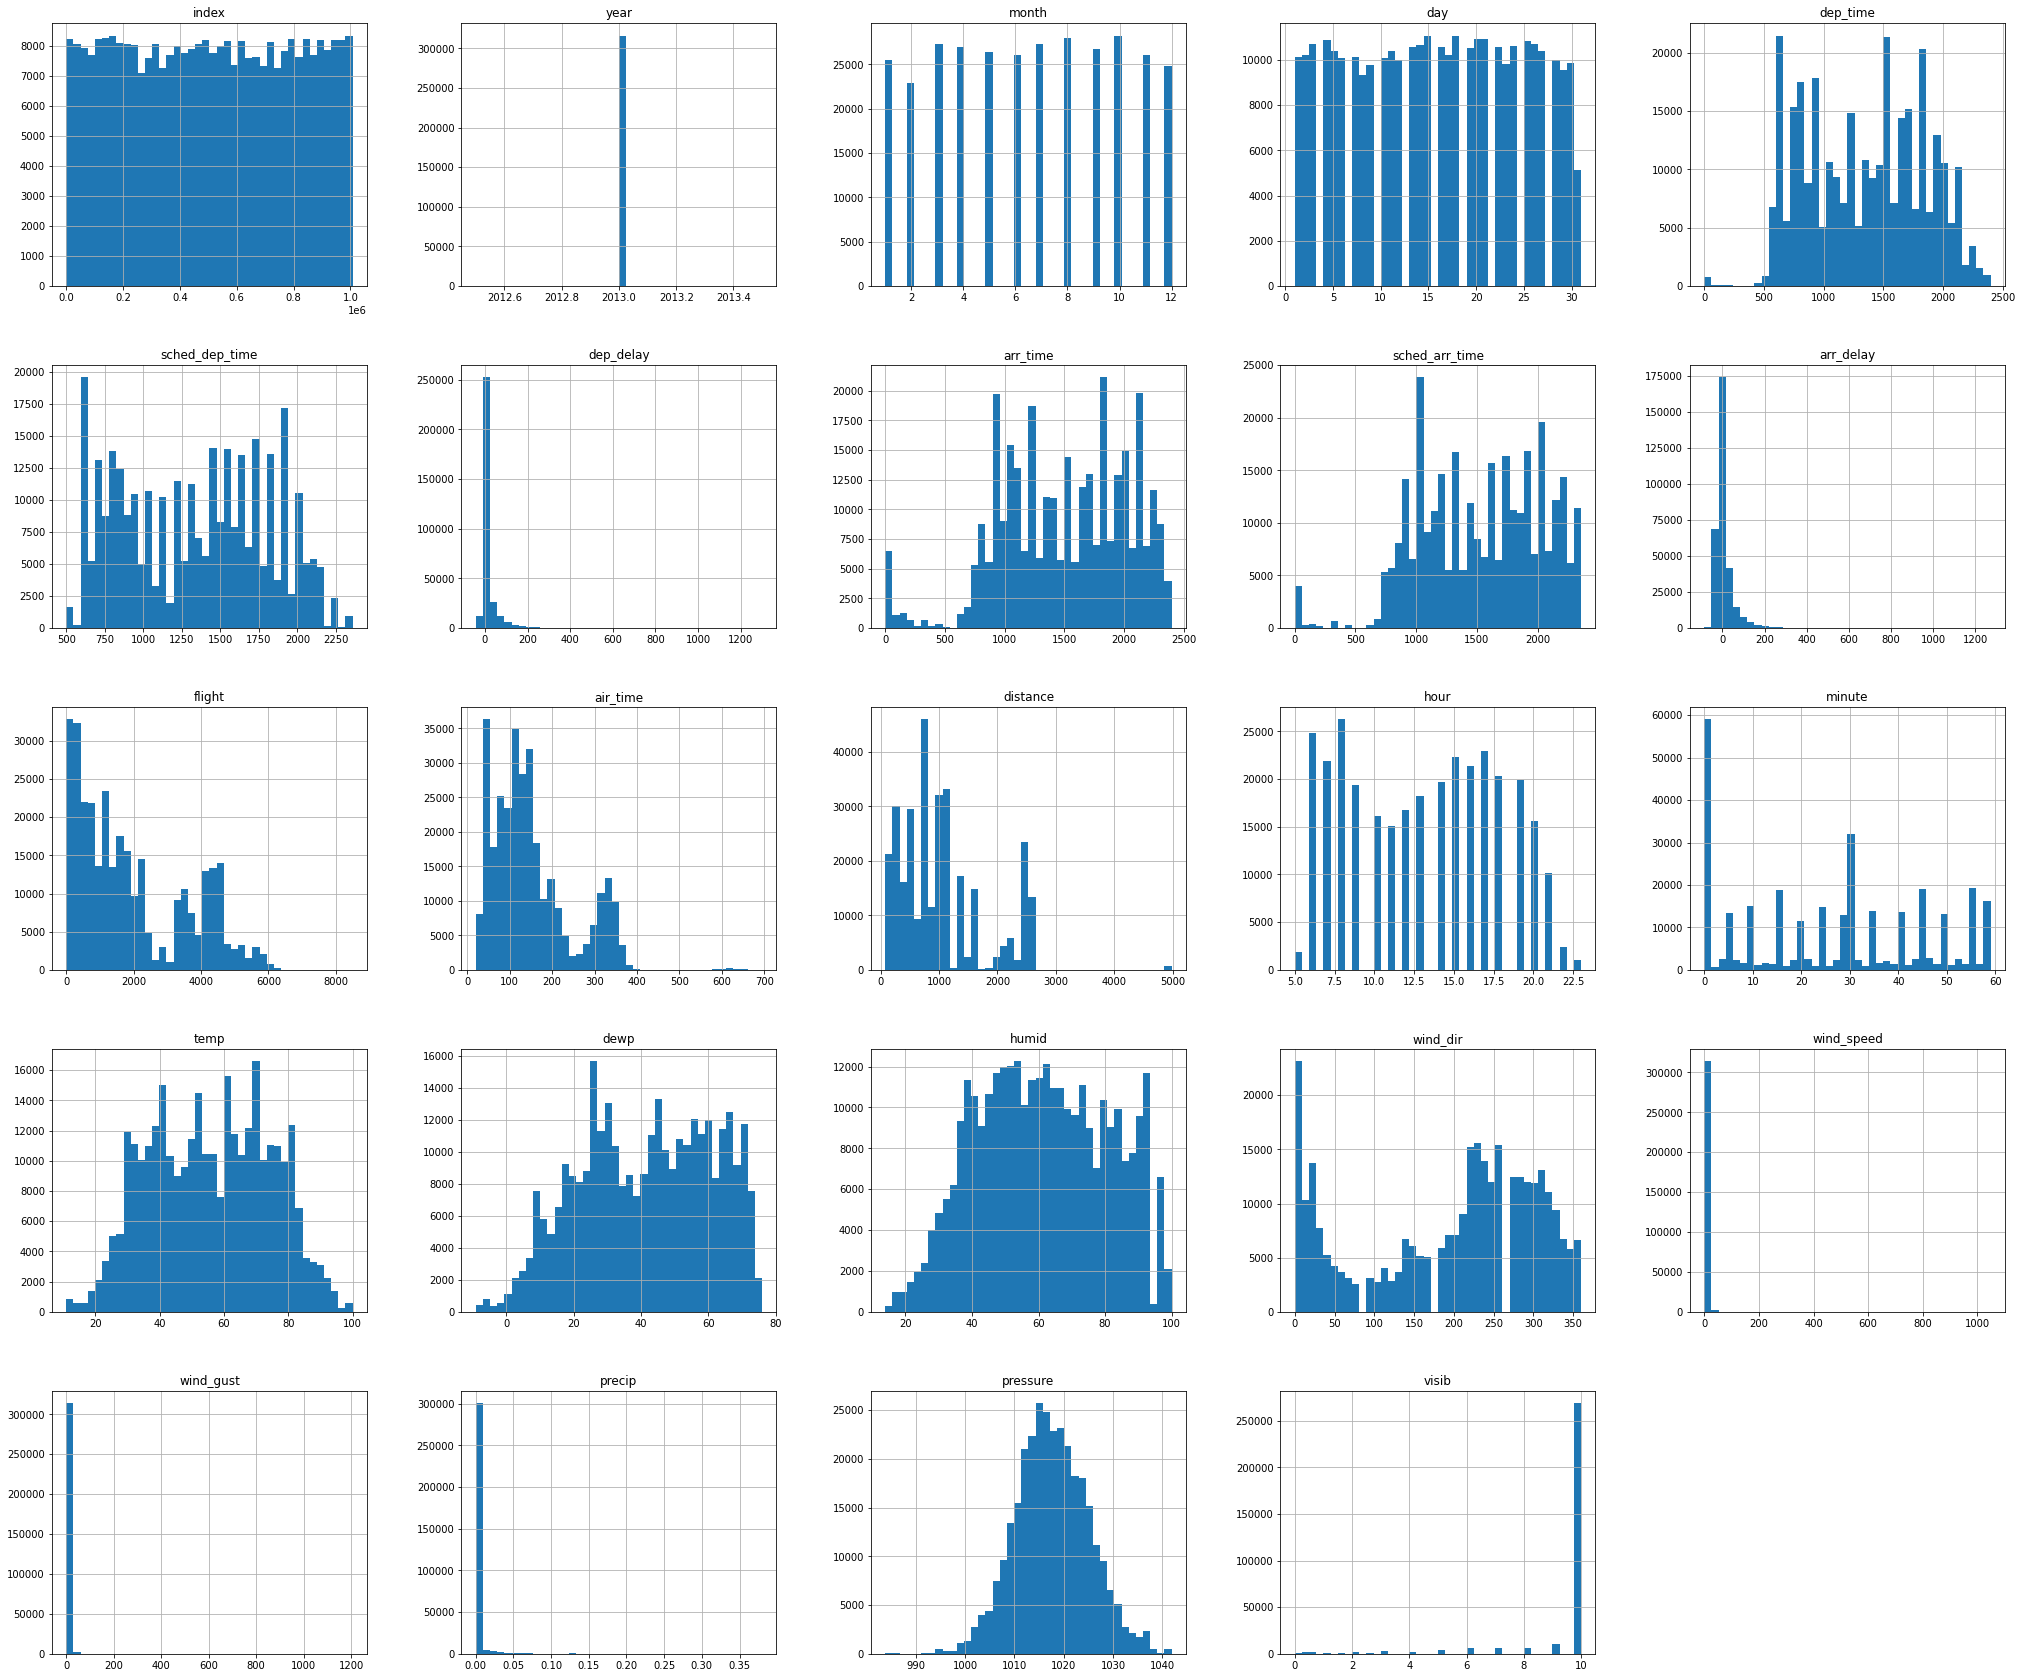

In [ ]:
dataset.hist(figsize = (35,30), bins = 40)
plt.show()

In [ ]:
dataset.corr()

,index,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
index,1.000000,NaN,0.076562,0.098851,0.005788,0.004347,0.050655,-0.021930,-0.012977,0.019025,-0.000428,-0.032135,0.015400,0.003435,0.022402,0.654072,0.605903,0.054889,-0.006084,-0.038182,-0.038182,-0.032558,-0.165455,0.111793
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.076562,NaN,1.000000,0.003379,-0.007430,-0.006885,-0.023291,-0.005757,-0.006641,-0.022335,0.001586,0.008980,0.019959,-0.007545,0.015576,0.242402,0.260007,0.089136,-0.083304,-0.054939,-0.054939,-0.017147,0.088488,0.031926
day,0.098851,NaN,0.003379,1.000000,-0.002816,-0.002952,0.005410,-0.007235,-0.004858,0.004277,-0.000649,0.001380,0.003220,-0.002994,0.000847,-0.003485,-0.018968,-0.033570,0.004725,-0.009858,-0.009858,0.035895,0.004376,0.044819
dep_time,0.005788,NaN,-0.007430,-0.002816,1.000000,0.957274,0.255109,0.668212,0.785416,0.226441,0.041783,-0.015228,-0.014283,0.955943,0.091805,0.227226,-0.021950,-0.467822,0.115949,0.077815,0.077815,-0.012682,-0.042120,0.037271
sched_dep_time,0.004347,NaN,-0.006885,-0.002952,0.957274,1.000000,0.195444,0.651688,0.782023,0.169182,0.029254,-0.016261,-0.013319,0.999155,0.082640,0.231091,-0.027911,-0.488283,0.120703,0.078614,0.078614,-0.019626,-0.037792,0.048606
dep_delay,0.050655,NaN,-0.023291,0.005410,0.255109,0.195444,1.000000,0.028321,0.158403,0.912442,0.051896,-0.019257,-0.018247,0.194783,0.028190,0.099559,0.096312,0.021503,-0.007540,0.025444,0.025444,0.056176,-0.106620,-0.088027
arr_time,-0.021930,NaN,-0.005757,-0.007235,0.668212,0.651688,0.028321,1.000000,0.796492,0.021756,0.025626,0.053242,0.046596,0.651673,0.040872,0.151254,-0.053559,-0.394249,0.094922,0.059859,0.059859,-0.025168,0.004256,0.039075
sched_arr_time,-0.012977,NaN,-0.006641,-0.004858,0.785416,0.782023,0.158403,0.796492,1.000000,0.129765,0.014819,0.077769,0.072891,0.782007,0.048997,0.183578,-0.039966,-0.425635,0.101040,0.068486,0.068486,-0.018725,-0.020151,0.034959
arr_delay,0.019025,NaN,-0.022335,0.004277,0.226441,0.169182,0.912442,0.021756,0.129765,1.000000,0.071639,-0.033134,-0.059741,0.168756,0.020861,0.071118,0.082006,0.044490,-0.020636,0.026107,0.026107,0.069880,-0.118840,-0.108389


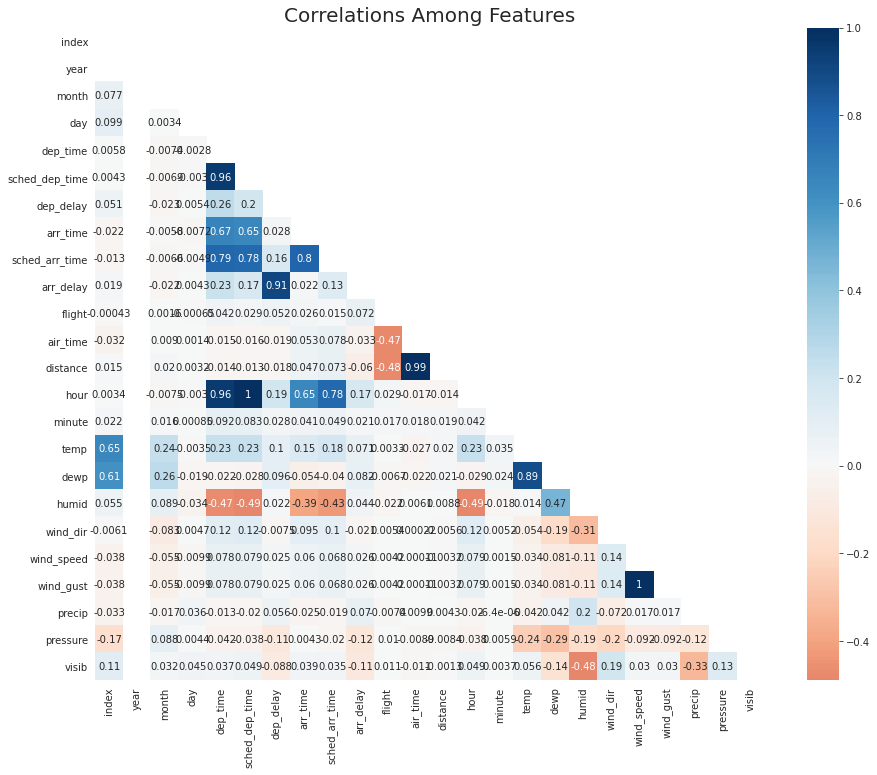

In [ ]:
mask = np.zeros_like(dataset.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(dataset.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu',
            center = 0)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);

## Observation
- pressure highly correlated with day and wind speed
- dep_time highly correlated with schduled dep time, arr_time, time,humidity
- air time highly correlated with flight 
- wind gust and wind speed almost same 
- wind gust/speed highly correlated with humidity
- humid highly related to hour
- dewp highly correlated with temp
- temp highly correlated with hour

## Statistical Inference

In [ ]:
dataset.describe()

,index,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
count,3.161650e+05,316165.0,316165.000000,316165.000000,316165.000000,316165.000000,316165.000000,316165.000000,316165.000000,316165.000000,316165.000000,316165.000000,316165.000000,316165.000000,316165.000000,316165.000000,316165.000000,316165.000000,316165.000000,316165.000000,316165.000000,316165.000000,316165.000000,316165.000000
mean,5.036146e+05,2013.0,6.550918,15.767612,1346.591172,1338.693951,11.975598,1500.709269,1531.119773,6.162172,1944.945677,150.597232,1048.369687,13.124995,26.194465,55.841998,41.448613,61.371052,194.061487,9.892701,11.384322,0.002423,1017.673534,9.376137
std,2.928881e+05,0.0,3.405615,8.753488,489.031410,468.928238,39.276151,532.444533,499.154651,43.788760,1622.537229,93.650077,735.866022,4.677296,19.284830,18.400553,19.475923,19.452292,111.561584,17.409081,20.034022,0.017261,7.486519,1.853368
min,6.000000e+00,2013.0,1.000000,1.000000,1.000000,500.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,80.000000,5.000000,0.000000,10.940000,-9.040000,13.950000,0.000000,0.000000,0.000000,0.000000,983.800000,0.000000
25%,2.464490e+05,2013.0,4.000000,8.000000,904.000000,900.000000,-5.000000,1103.000000,1120.000000,-17.000000,544.000000,82.000000,509.000000,9.000000,8.000000,39.920000,26.060000,45.970000,100.000000,5.753900,6.621473,0.000000,1012.600000,10.000000
50%,5.027520e+05,2013.0,7.000000,16.000000,1358.000000,1355.000000,-2.000000,1533.000000,1552.000000,-5.000000,1471.000000,129.000000,888.000000,13.000000,29.000000,55.940000,42.080000,60.810000,230.000000,9.206240,10.594357,0.000000,1017.500000,10.000000
75%,7.595810e+05,2013.0,10.000000,23.000000,1744.000000,1729.000000,10.000000,1940.000000,1944.000000,13.000000,3416.000000,191.000000,1389.000000,17.000000,44.000000,71.060000,57.920000,77.320000,280.000000,12.658580,14.567241,0.000000,1022.700000,10.000000
max,1.007588e+06,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000,100.040000,75.920000,100.000000,360.000000,1048.360580,1206.432388,0.380000,1041.900000,10.000000


Text(0.5, 0, 'Mean delay [min] (@departure: blue, @arrival: hatch lines)')

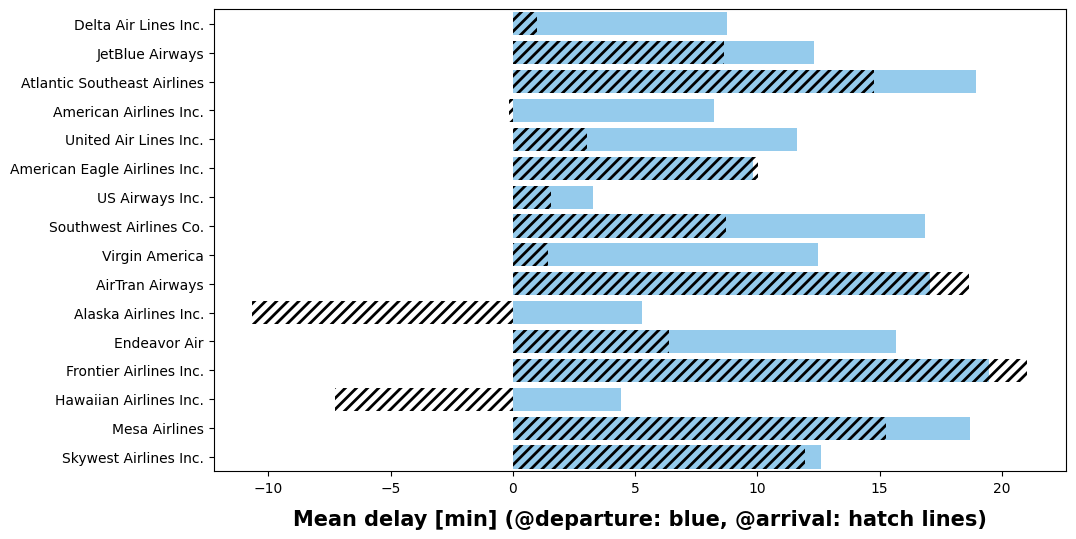

In [ ]:
#plotting mean delays by airlines
carriers = pd.read_csv("carriers.csv")
carrier_code=carriers.set_index('IATA_CODE')['AIRLINE'].to_dict()
mpl.rc('patch', edgecolor = 'dimgray', linewidth = 1)
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0

fig = plt.figure(1, figsize = (11, 6))
ax = sns.barplot(x = 'dep_delay', y = 'carrier', data = dataset, color = 'lightskyblue', ci = None)
ax = sns.barplot(x = 'arr_delay', y = 'carrier', data = dataset, color = 'r', hatch = '///', alpha = 0.0, ci = None)
labels = [carrier_code[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.yaxis.label.set_visible(False)
plt.xlabel("Mean delay [min] (@departure: blue, @arrival: hatch lines)", fontsize = 15, weight = 'bold', labelpad = 10)

5 major carriers in US with their Mean Delay:
- __American Airlines- AA__
- __Delta Air Lines- DL__
- __Frontier Airlines- F9__
- __Hawaiian Airlines- HA__
- __JetBlue- B6__

Text(0.5, 0, "5 Major Carrier's Mean Delay [min] (@departure: blue, @arrival: hatch lines)")

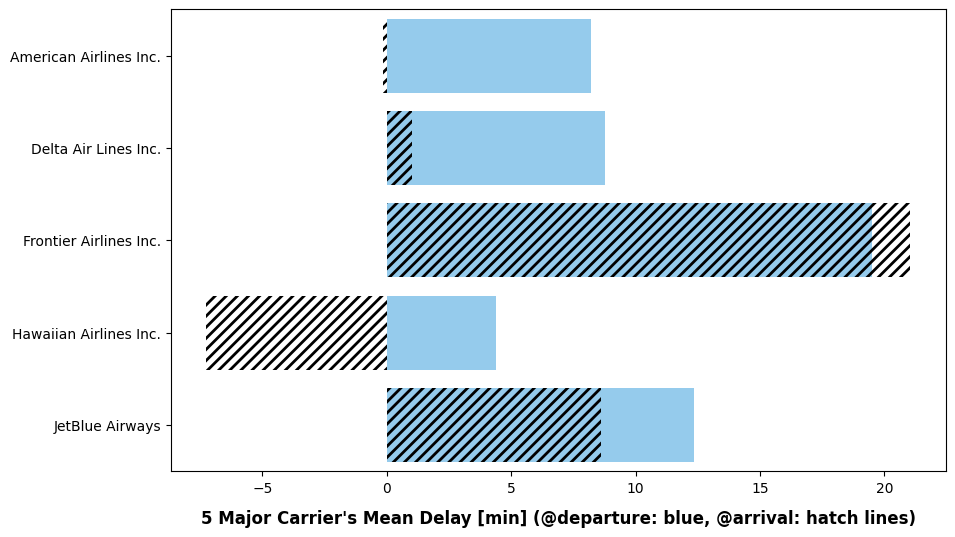

In [ ]:
mpl.rc('patch', edgecolor = 'dimgray', linewidth = 1)
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0

fig = plt.figure(1, figsize = (10, 6))

#Subset 4 major airlines
ax = sns.barplot(x = 'dep_delay', y = 'carrier', data = dataset, order = ['AA', 'DL', 'F9', 'HA', 'B6'], color = 'lightskyblue', ci = None)
ax = sns.barplot(x = 'arr_delay', y = 'carrier', data = dataset, order = ['AA', 'DL', 'F9', 'HA', 'B6'], color = 'r', hatch = '///', alpha = 0.0, ci = None)
labels = [carrier_code[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.yaxis.label.set_visible(False)
plt.xlabel("5 Major Carrier's Mean Delay [min] (@departure: blue, @arrival: hatch lines)", fontsize = 12, weight = 'bold', labelpad = 10)